### CIC is looking for you to make suggestions about potential “rules” that they could implement with Jornaya data to positively impact their lead-buying strategy. For example, these are some good questions and points to start with:
- Based on the data available, is there a certain type of lead that CIC should not bother purchasing?
- Are there consumers that CIC should prioritize purchase and trying to contact? 
- What are the characteristics of the leads that CIC should not and should prioritize purchasing, and how can they implement rules using Jornaya data to distinguish these leads?
- How much of a difference does having Jornaya data available make vs. not having it available?
- Remember we are aiming to prove Jornaya’s data can have a meaningful and valuable impact to CIC, so showing numbers for how these rules can affect CIC will increase the strength of your story.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import wrangle

In [2]:
df = pd.read_csv('clean_CIC.csv').set_index('token')

In [3]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
token,,,,,,,,,,,,
1,C,50,0,0,74,962,10,2,0,0,1,0
2,C,50,0,0,47,617,9,3,0,0,1,0
3,A,75,0,0,7,94,14,1,1,0,0,0
4,C,75,0,0,29,104,15,1,0,0,1,0
5,D,75,0,0,27,82,9,1,0,0,0,1


___

## Make more dummies to explore with

### Lead cost

In [4]:
# dummy lead cost feature
dummy_df =  pd.get_dummies(df['lead_cost'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['lead_costs_25', 'lead_costs_50', 
                    'lead_costs_75', 'lead_costs_100']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

### Competitors

In [5]:
# dummy competitors feature
dummy_df =  pd.get_dummies(df['competitors'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['competitors_0', 'competitors_1', 
                    'competitors_2', 'competitors_3']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

___

## Split the data

In [6]:
train, validate, test = wrangle.split_CIC(df)
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test) 
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

___

## Target Variable Initial Explore

<AxesSubplot:xlabel='purchase', ylabel='count'>

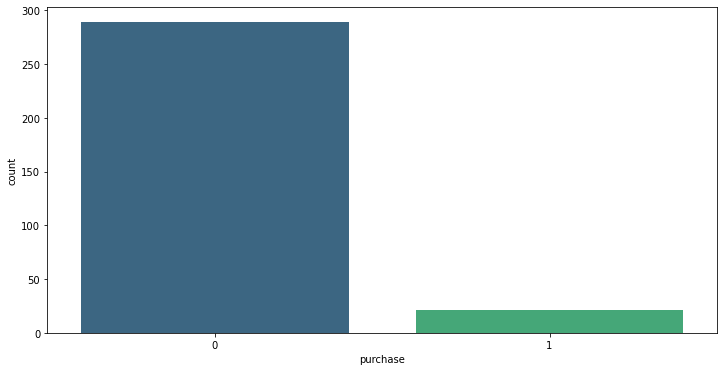

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train.purchase, palette='viridis')

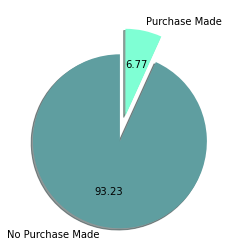

In [8]:
explode = (0.3, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(train['purchase'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

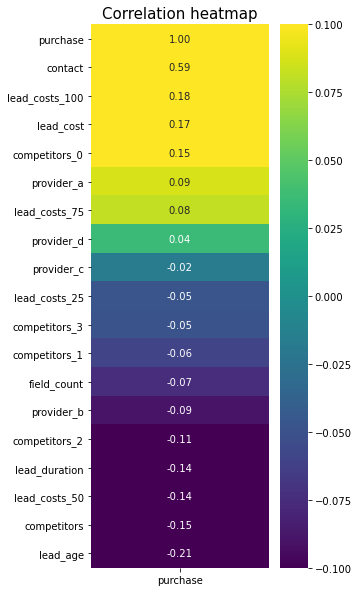

In [9]:
# Correlation heatmap
corr = pd.DataFrame(train.corr()['purchase'].sort_values(ascending = False))
plt.figure(figsize = (4,10))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.1, 
            vmax = 0.1, cmap = 'viridis')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

### Takeaways:
- Only 6.77% of leads purchased with CIC is converted into a sell.
- Form the correlation heatmap:
    - top features with a correlation to purchase are:
        - contact with a pos corr of 0.59
            - cannot be used due to contact happening after a purchase has been made.
        - lead_age with a neg corr of -0.21
        - lead_cost with a pos corr of 0.17
            - cost of 100 has a correlation of 0.18
            - cost of 50 has a negative correlation of -0.14
            - cost of 75 has a correlation of 0.08
            - cost of 25 has a negative correlation of -0.05
        - competitors with neg corr of -0.15
            - having 0 competitors has a correlation of 0.15
            - having 2 competitors has a negative correlation of -0.11
            - having 1 competitor has a negative correlation of -0.06
            - having 3 competitors has a negative correlation of -0.05
        - lead_duration with neg corr of -0.14

### Questions Arised:
- How can we optimize sales?
- Are there any major players causing 93.23% of our leads to not make a sale?
- How much money are we loosing in this 93.23% of leads?

___

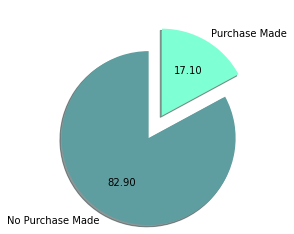

In [10]:
explode = (0.3, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(train['contact'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Purchase Made', 'Purchase Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

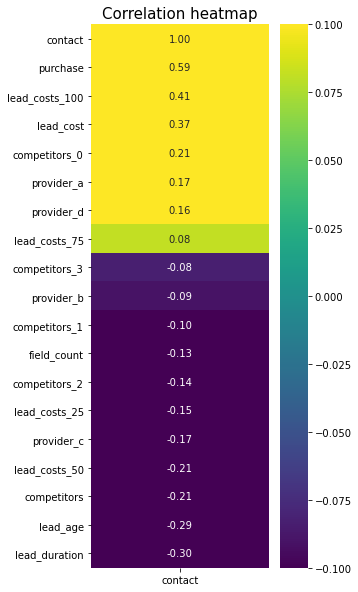

In [11]:
# Correlation heatmap
corr = pd.DataFrame(train.corr()['contact'].sort_values(ascending = False))
plt.figure(figsize = (4,10))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.1, 
            vmax = 0.1, cmap = 'viridis')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

### Takeaways:
- Only 17.10% of leads are able to be contacted.
- Form the correlation heatmap:
    - top features with a correlation to purchase are:
        - purchase
            - cannot be used because it happens after contact is made.
        - lead_age with a correlation of - 0.29
        - lead cost with a correlation of 0.37
            - costs of 100 have a correlation of 0.41
            - costs of 50 have a neg correlation of -0.21
            - costs of 25 have a neg correlation of -0.15
            - costs of 75 have a correlation of 0.08
        - lead_duration with a correlation of -0.30
        - competiors with a correlation of -0.21
            - having 0 competitors has a correlation of 0.21
            - having 2 competitors has a negative correlation of -0.14
            - having 1 competitor has a negative correlation of -0.10
            - having 3 competitors has a negative correlation of -0.08

        
        

### Questions Arised:
- How can we optimize sales?
- Who should CIC prioritize contacting?
- What rules should we suggest when it comes to contacting consumers?

___

## Univariate

### Provider

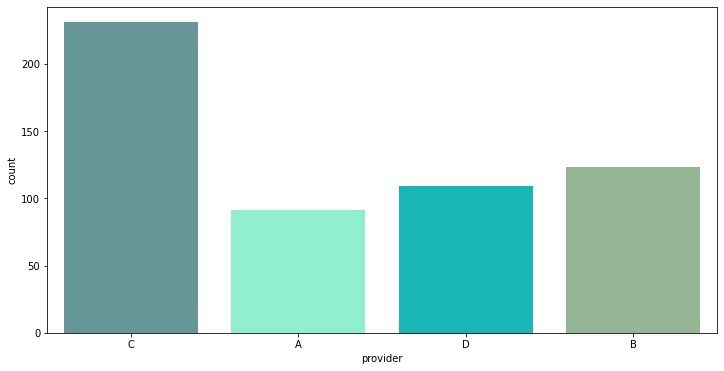

C    231
B    123
D    109
A     91
Name: provider, dtype: int64


In [12]:
plt.figure(figsize=(12,6))
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']
sns.countplot(data=df, x=df.provider, palette=colors)
plt.show()
print(df.provider.value_counts())

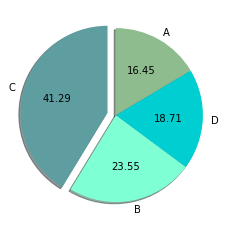

In [13]:
explode = (0.1, 0, 0, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(train['provider'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['C', 'B', 'D', 'A'], shadow=True,
        explode=explode, colors=colors)
plt.show()

### Takeaways:
- Provider C provides 41.29% of all CIC's leads
    - This is more than Providers A and B combined
        - A & B provide for 40% of all CIC's leads
        
### Questions arised:
- How does Provider C's statistics match up to the others?
___

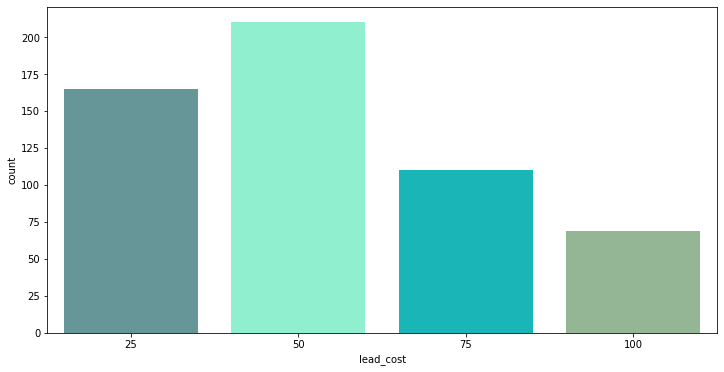

50     210
25     165
75     110
100     69
Name: lead_cost, dtype: int64


In [14]:
plt.figure(figsize=(12,6))
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']
sns.countplot(data=df, x=df.lead_cost, palette=colors)
plt.show()
print(df.lead_cost.value_counts())

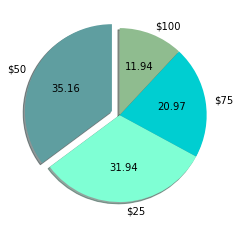

In [15]:
explode = (0.1, 0, 0, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(train['lead_cost'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['$50', '$25', '$75', '$100'], shadow=True,
        explode=explode, colors=colors)
plt.show()

### Takeaways
- Leads that cost 50 dollars make up for 35.16% of all leads
- Second most common cost is $25 making up for 31.94% of all leads
- The 2 highest costs are less often purchased

### Qustions arised
- Do the higher priced ones purchase more often? Is that why they are priced higher?
- How are the 25 and 50 dollar level performing?

___

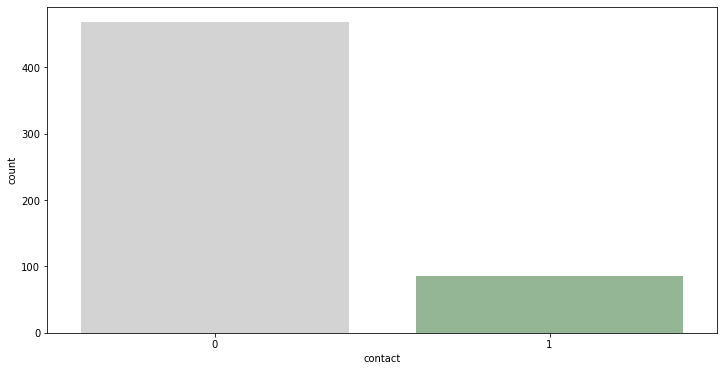

0    468
1     86
Name: contact, dtype: int64


In [16]:
plt.figure(figsize=(12,6))
colors = ['lightgrey','darkseagreen']
sns.countplot(data=df, x=df.contact, palette=colors)
plt.show()
print(df.contact.value_counts())

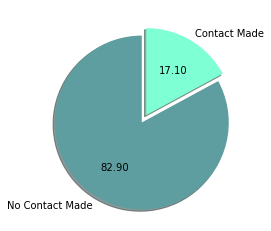

In [17]:
explode = (0.1, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(train['contact'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['No Contact Made', 'Contact Made'], shadow=True,
        explode=explode, colors=colors)
plt.show()

### Takeaways:
- Only 17.1% of leads were able to be contacted by CIC.

### Questions:
- How many of the people that were contacted signed on?
- Did a certain provider or price point perform best when being contacted?

___

### Lead Age
- Number of seconds between when a consumer submitted an online form to when CIC received the lead

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


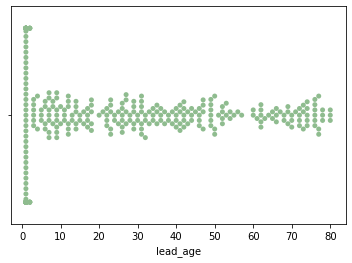

In [18]:
sns.swarmplot(data=train, x='lead_age', color='darkseagreen', edgecolor='black')
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


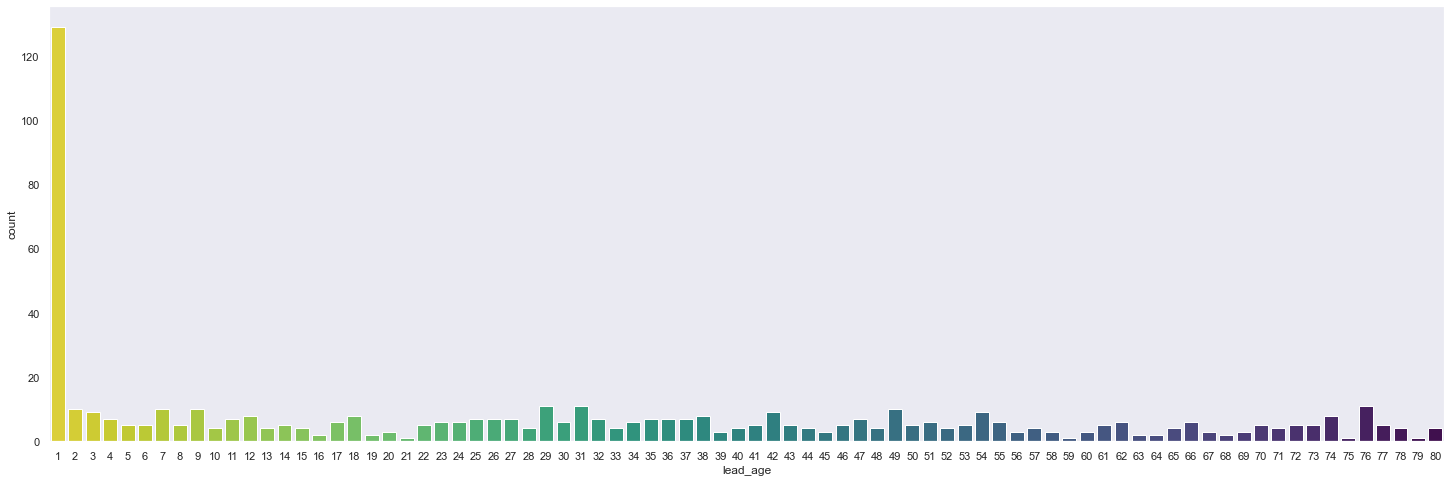

In [19]:
plt.figure(figsize=(25,8))
sns.set(style="dark")
sns.countplot(df['lead_age'], palette='viridis_r')
plt.show()

### Takeaways:
- It mostly only takes 1 second to send to CIC.

___

### Lead Duration
- number of seconds a consumer spent completing the online form 

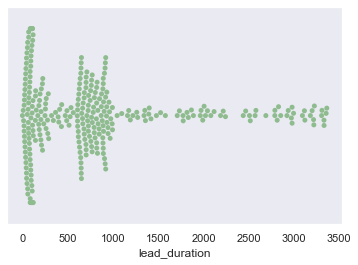

In [20]:
sns.swarmplot(data=train, x='lead_duration', color='darkseagreen', edgecolor='black')
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


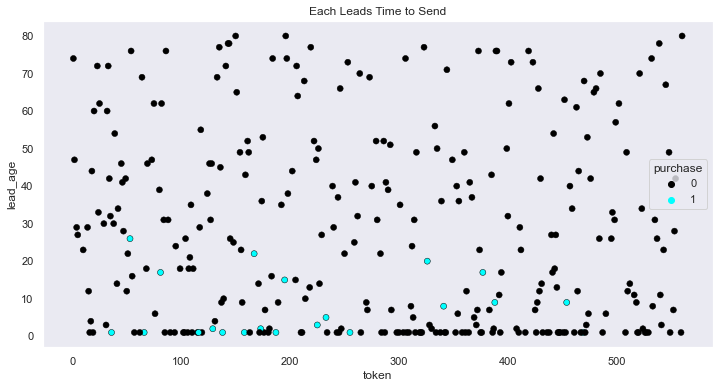

In [21]:
plt.figure(figsize=(12,6))
# create color palette
colors = ['black','cyan']
sns.scatterplot(train.index, train.lead_age, hue=train.purchase, 
                palette=colors, edgecolor='black')
# set title
plt.title('Each Leads Time to Send')
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


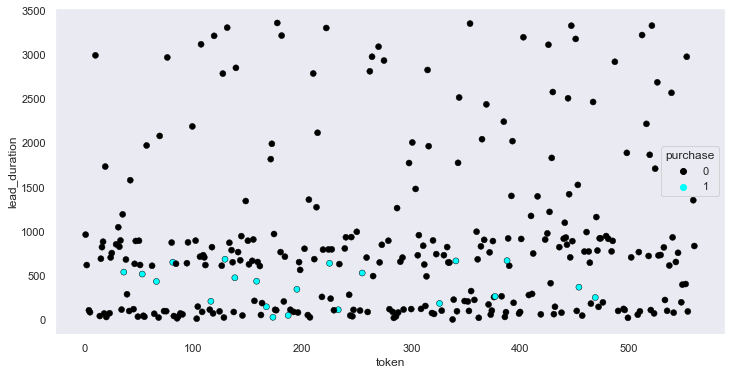

In [22]:
plt.figure(figsize=(12,6))
# create color palette
colors = ['black','cyan']
sns.scatterplot(train.index, train.lead_duration, hue=train.purchase, 
                palette=colors, edgecolor='black')
plt.show()

### Takeaways:
- There seems to multiple spikes beween 0 and 100
- There are no purchases above 1000 second lead_duration.
- There are no purchases above 30 second lead_age.

___

### Field Count
- The number of field needed to submit form

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


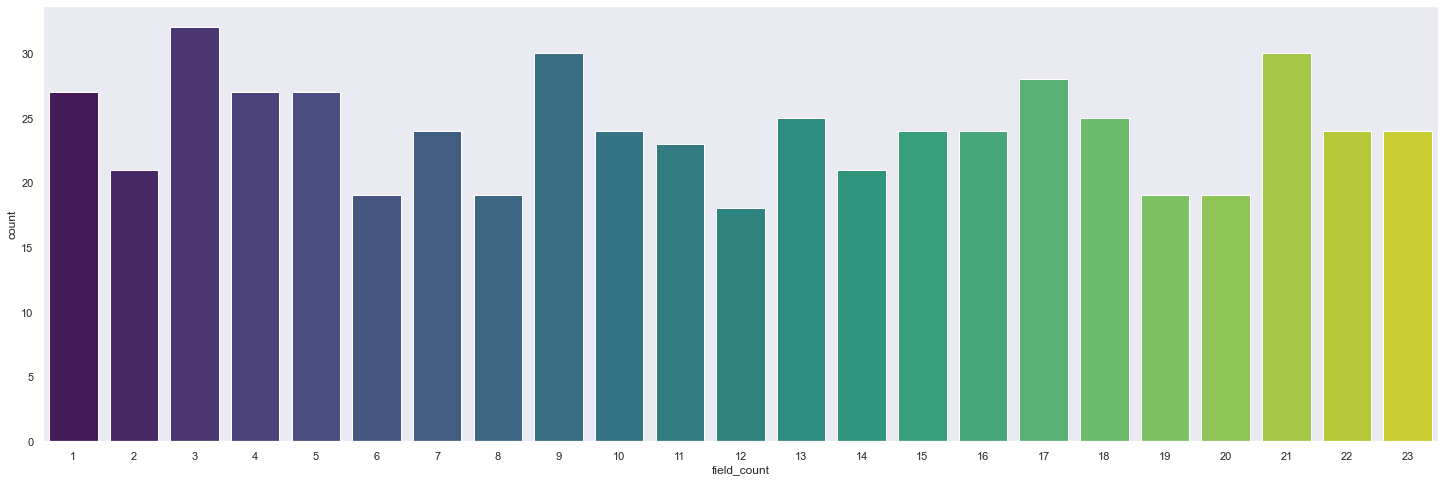

In [23]:
plt.figure(figsize=(25,8))
sns.set(style="dark")
sns.countplot(df['field_count'], palette='viridis')
plt.show()

### Takeaways:
- Nothing really stands out

### Questions Arised:
- Is there a field count that mostly plays into a purchase not being made?
    - For example are the hgiher number of field counts mean that a customer is more interested? 
    - Or is the higher the number attributing to a lower chance of purchasing?

___

## Competitors

<AxesSubplot:xlabel='competitors', ylabel='count'>

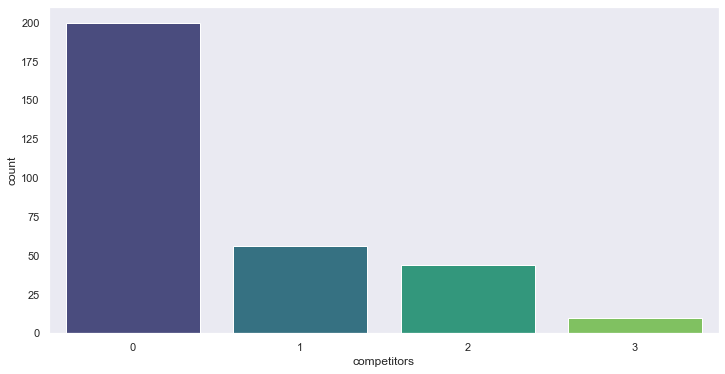

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train.competitors, palette='viridis')

In [25]:
train.competitors.value_counts()

0    200
1     56
2     44
3     10
Name: competitors, dtype: int64

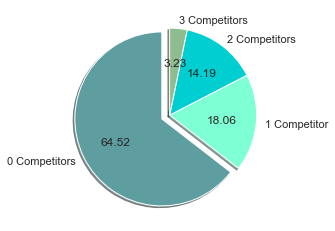

In [26]:
explode = (0.1, 0, 0, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(train['competitors'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['0 Competitors', '1 Competitor', '2 Competitors', 
                '3 Competitors'], shadow=True,
        explode=explode, colors=colors)
plt.show()

### Takeaways:
- 64.52% of the lead have 0 competitors for CIC to go against.

### Questions Arised:
- If such a large ratio of leads have no competitors, why is it that there is only 6.77% of leads signing on with CIC?

___

## Questions to Answer
- Why are the 72 leads at a cost of 100 so costly in comparison to others? 
- Why is it that there is only 6.77% of leads signing on with CIC?
- How many of the ones with one or more competitors are signing on with CIC?
- Is the purchase affected by the number of fields required on the submission form?
- Does the amount of time a consumer took to fill out submission form play into making a purchase with CIC?
- Is there a correlation between lead_age and provider?
- How can we optimize sales?
- Are there any major players causing 93.23% of our leads to not make a sale?
- How much money are we loosing in this 92.23% of leads?
- How do providers pay off statistics match up?
- Do the higher priced ones purchase more ofter? Is that why they are priced higher?
- How are the 25 and 50 dollar level performing?
- How many of the people that were contacted signed on?
- How many that were not contacted signed on? 
- If such a large ratio of leads have no competitors, why is it that there is only 6.77% of leads signing on with CIC?

___

___

## Answer Questions Using Bivariate and Multivariate

1. Why are the 72 leads at a cost of 100 so costly in comparison to others?

In [27]:
(df[(df['purchase'] == 1) & (df['provider'] == 'A')]).count()

provider          8
lead_cost         8
contact           8
purchase          8
lead_age          8
lead_duration     8
field_count       8
competitors       8
provider_a        8
provider_b        8
provider_c        8
provider_d        8
lead_costs_25     8
lead_costs_50     8
lead_costs_75     8
lead_costs_100    8
competitors_0     8
competitors_1     8
competitors_2     8
competitors_3     8
dtype: int64

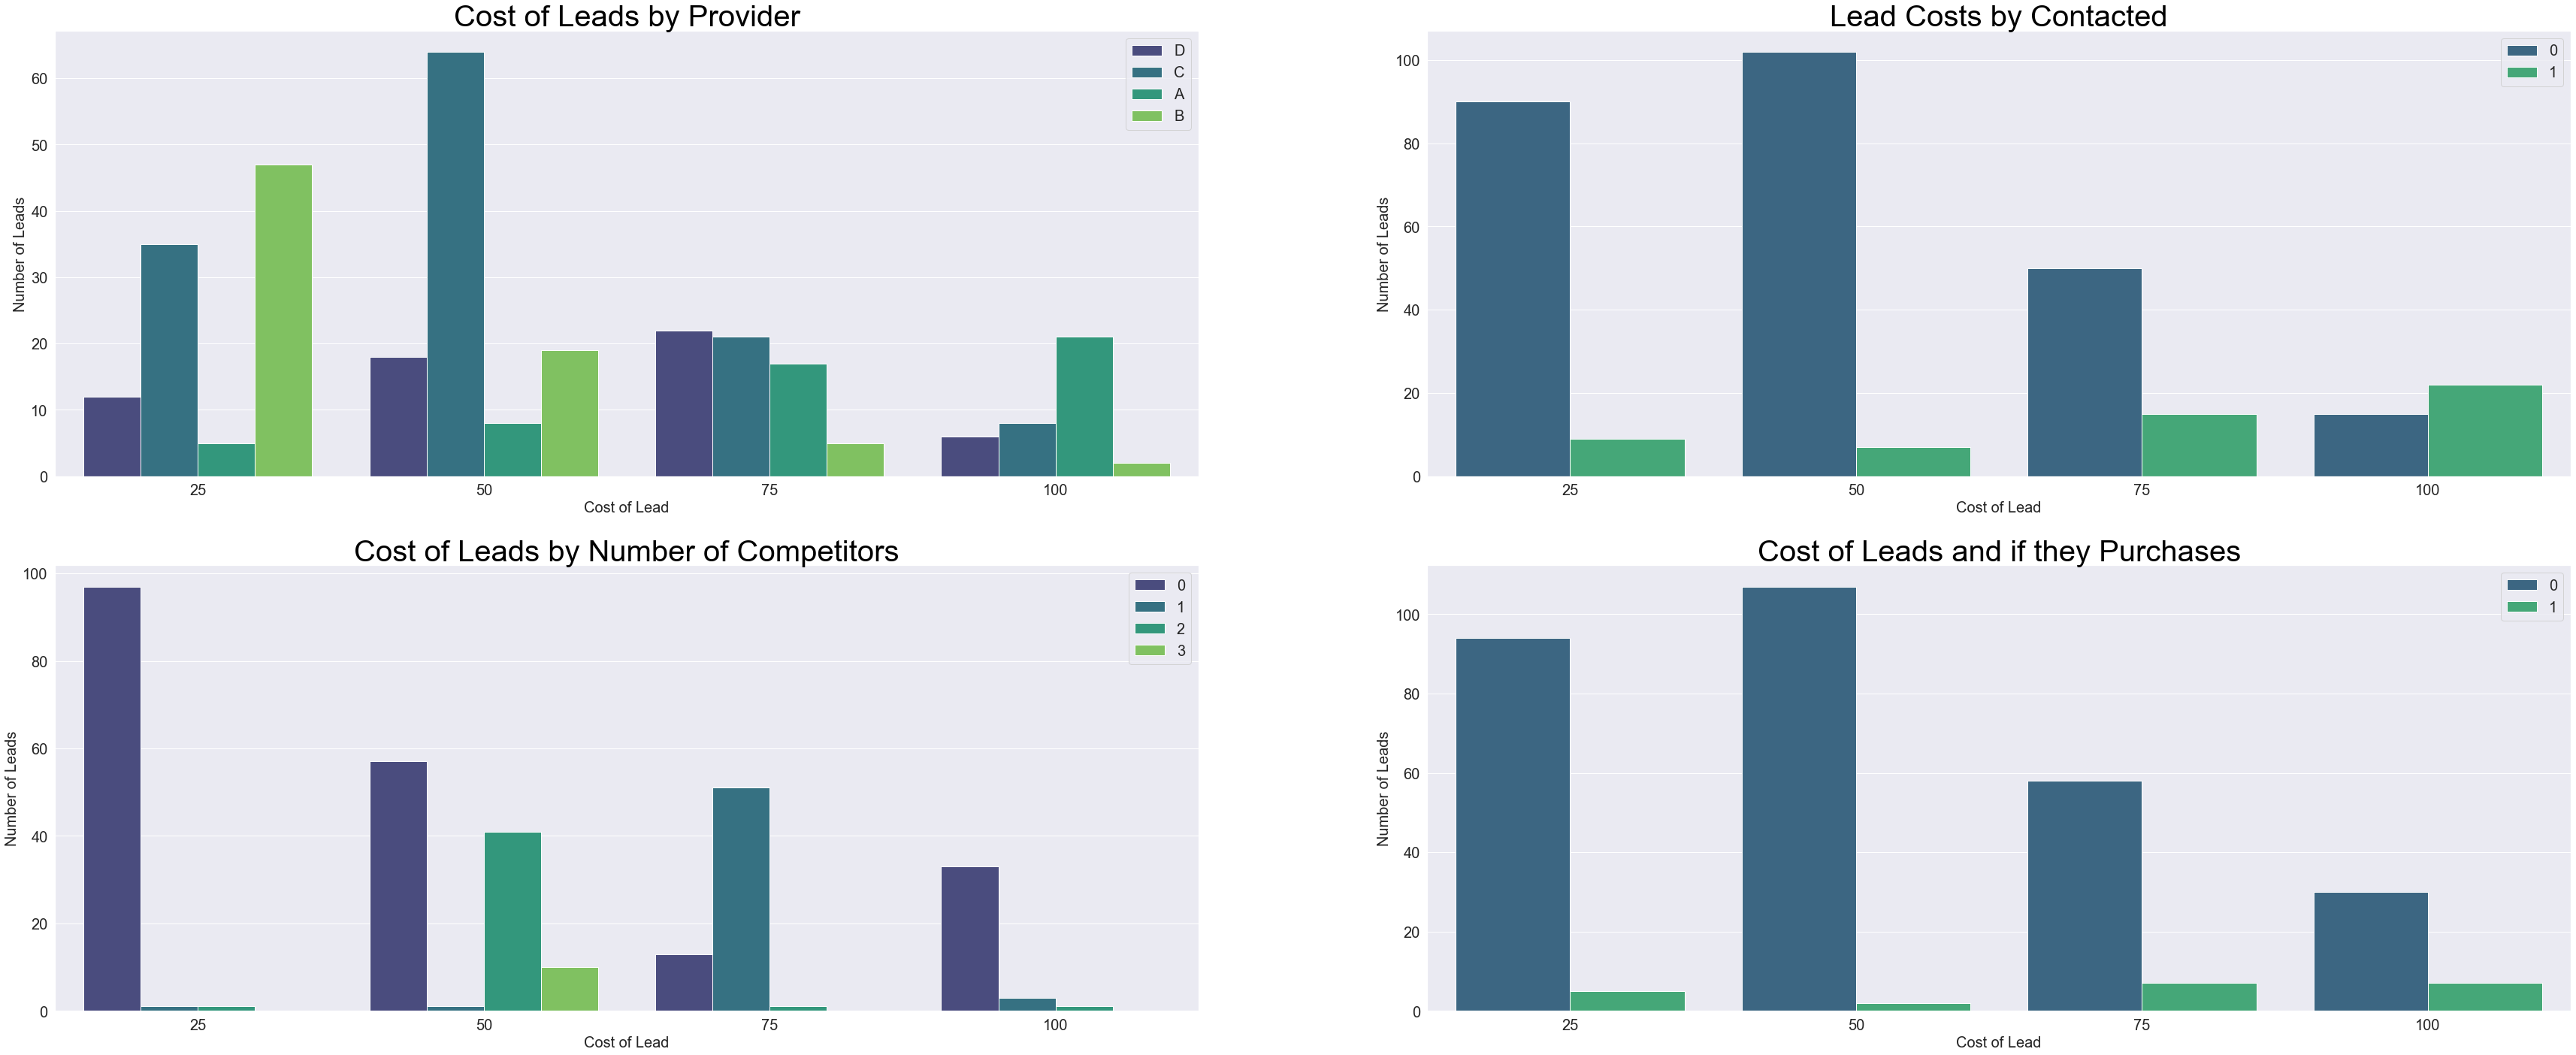

In [28]:
plt.subplots(2,2, figsize=(60,24), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.countplot(data=train, x='lead_cost', hue='provider', palette='viridis')
plt.title("Cost of Leads by Provider", size=40, color='black')
plt.xlabel("Cost of Lead", size=20)
plt.ylabel('Number of Leads', size=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(loc='upper right', prop={'size': 20})

plt.subplot(2,2,2)
sns.countplot(data=train, x='lead_cost', hue='contact', palette='viridis')
plt.title("Lead Costs by Contacted", size=40, color='black')
plt.xlabel("Cost of Lead", size=20)
plt.ylabel('Number of Leads', size=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(loc='upper right', prop={'size': 20})

plt.subplot(2,2,3)
sns.countplot(data=train, x='lead_cost', hue='competitors', palette='viridis')
plt.title("Cost of Leads by Number of Competitors", size=40, color='black')
plt.xlabel("Cost of Lead", size=20)
plt.ylabel('Number of Leads', size=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(loc='upper right', prop={'size': 20})

plt.subplot(2,2,4)
sns.countplot(data=train, x='lead_cost', hue='purchase', palette='viridis')
plt.title("Cost of Leads and if they Purchases", size=40, color='black')
plt.xlabel("Cost of Lead", size=20)
plt.ylabel('Number of Leads', size=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(loc='upper right', prop={'size': 20})

### Takeaways:
- Plot 1 ('Cost of Leads by Provider')
    - provider A seems to contibuting most to leads that cost 100 dollars
    - provider A also mostly sells at cost of 100 in comparison to the other pricings 
    - provider C contributed most to the 50 dollar range
- Plot 2 ('Lead Costs by Contacted')
    - the higher the cost the more leads were able to be contacted.
- Plot 3 ('Cost of leads by number of competitors')
    - Stange that those with 0 competitors have such a low cost.
    - Leads with 3 competitors are mostly found in the 50 dollar range
    - I dont think that the number of competitors play into the cost too much
- Plot 4 (Cost of Leads and if they were purchased')
    - 100 and 75 pricing seems to have slightly better success of getting customers.
    - 50 seems to be the weakest

___

2. How many of the ones with one or more competitors are signing on with CIC?

In [29]:
bought = df[df['purchase'] == 1]
comp_bought = bought.groupby('competitors').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

comp_bought

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
competitors,,,,,,,,,,,,,,,,,,,
0,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [30]:
not_bought = df[df['purchase'] != 1]
comp_not_bought = not_bought.groupby('competitors').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

comp_not_bought

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
competitors,,,,,,,,,,,,,,,,,,,
0,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339
1,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
2,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
3,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


### Takeaways:
- Most of the purchases come from those with 0 competitors
- very few leads with 2+ competotors purchase with CIC
- None of the leads with 3 competitors purchased with CIC

___

In [31]:
bought = df[df['purchase'] == 1]
prov_bought = bought.groupby('provider').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

prov_bought

,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
provider,,,,,,,,,,,,,,,,,,,
A,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
B,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
C,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
D,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [32]:
not_bought = df[df['purchase'] != 1]
prov_not_bought = not_bought.groupby('provider').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

prov_not_bought

,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
provider,,,,,,,,,,,,,,,,,,,
A,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
B,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
C,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221
D,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102


### Takeaways:
- 4.3% of provider C's leads result in a sale
- 8.8% of provider A's leads result in a sale
- 1.6% of provider B's leads result in a sale
- 6.4% of provider D's leads result in a sale

___

3. Is the purchase affected by the number of fields required on the submission form?

In [33]:
bought = df[df['purchase'] == 1]
field_bought = bought.groupby('field_count').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

field_bought

,provider,lead_cost,contact,purchase,lead_age,lead_duration,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
field_count,,,,,,,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


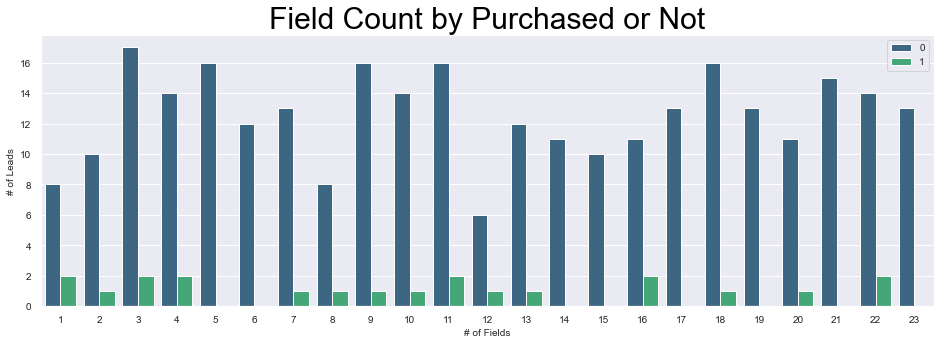

In [34]:
plt.figure(figsize=(16,5))
sns.countplot(data=train, x='field_count', hue='purchase', palette='viridis')
plt.title("Field Count by Purchased or Not", size=30, color='black')
plt.xlabel("# of Fields", size=10)
plt.ylabel('# of Leads', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

### Takeaways:
- Fields 1, 3, 4, 11, 16, and 22 each had 2 leads purchase from CIC
- Fields 2, 7, 8, 9 10,12, 13, 18, and 20 each only had 1 lead purchase with CIC
- Fields 5, 6, 14, 15, 17, 19, 21, and 23 had no leads purchase from CIC

it doesnt seem that field count has much to do with if a lead will or will not purchas with CIC

___

4.  Does the amount of time a consumer took to fill out submission form play into making a purchase with CIC? (lead_duration)

In [35]:
not_bought = df[df['purchase'] != 1]
duration_not_bought = not_bought.groupby('lead_duration').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

duration_not_bought

,provider,lead_cost,contact,purchase,lead_age,field_count,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
lead_duration,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3332,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3355,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [36]:
bought = df[df['purchase'] == 1]
duration_bought = bought.groupby('lead_duration').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

duration_bought

,provider,lead_cost,contact,purchase,lead_age,field_count,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
lead_duration,,,,,,,,,,,,,,,,,,,
25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
46,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
110,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
143,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
144,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
182,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
206,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
212,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
249,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


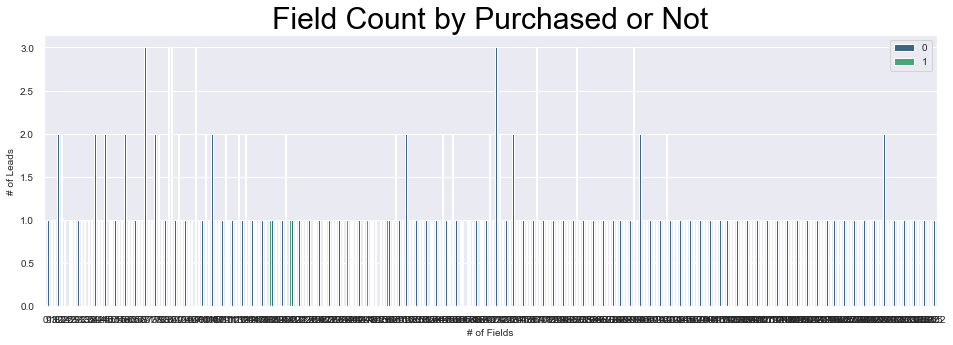

In [37]:
plt.figure(figsize=(16,5))
sns.countplot(data=train, x='lead_duration', hue='purchase', palette='viridis')
plt.title("Field Count by Purchased or Not", size=30, color='black')
plt.xlabel("# of Fields", size=10)
plt.ylabel('# of Leads', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

### Takeaways:
- No duration had more than 1 sold lead

___

5. Is there a correlation between lead_duration and provider?
    - seconds, between when a consumer submitted an online form to when CIC received the lead

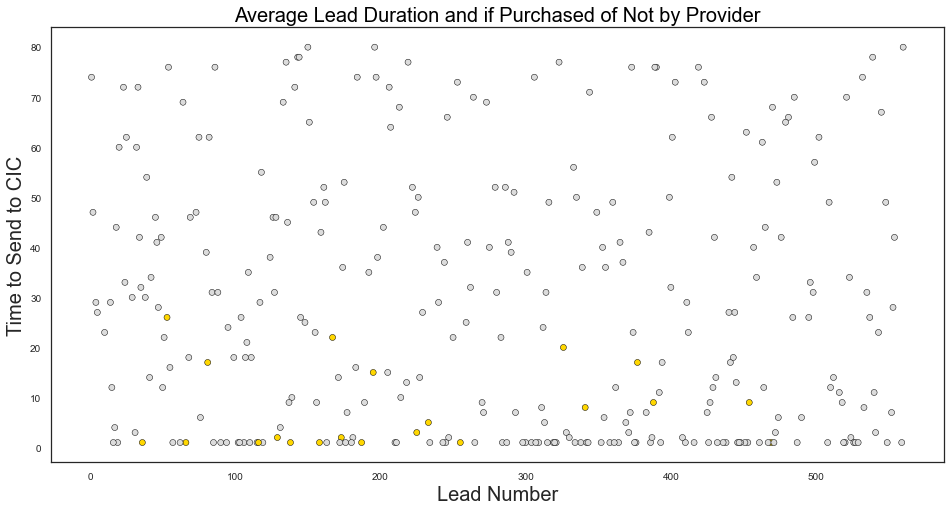

In [38]:
plt.figure(figsize=(16,8))
sns.set(style="white")
clrs = ['gainsboro', 'gold']
sns.scatterplot(data=train, x=train.index, y='lead_age', hue='purchase', palette=clrs, 
                edgecolor='black', legend=None)
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Lead Number", size=20)
plt.ylabel('Time to Send to CIC', size=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.savefig("age_scatter", transparent=True)

In [39]:
df[(df['purchase'] == 1) & (df['lead_duration'])].mean()

lead_cost          69.642857
contact             1.000000
purchase            1.000000
lead_age            6.714286
lead_duration     463.000000
field_count        11.928571
competitors         0.142857
provider_a          0.285714
provider_b          0.071429
provider_c          0.357143
provider_d          0.285714
lead_costs_25       0.214286
lead_costs_50       0.142857
lead_costs_75       0.285714
lead_costs_100      0.357143
competitors_0       0.857143
competitors_1       0.142857
competitors_2       0.000000
competitors_3       0.000000
dtype: float64

([<matplotlib.axis.XTick at 0x7ff6300f4ac0>,
 [Text(0, 0, 'Not Purchased'), Text(1, 0, 'Purchased')])

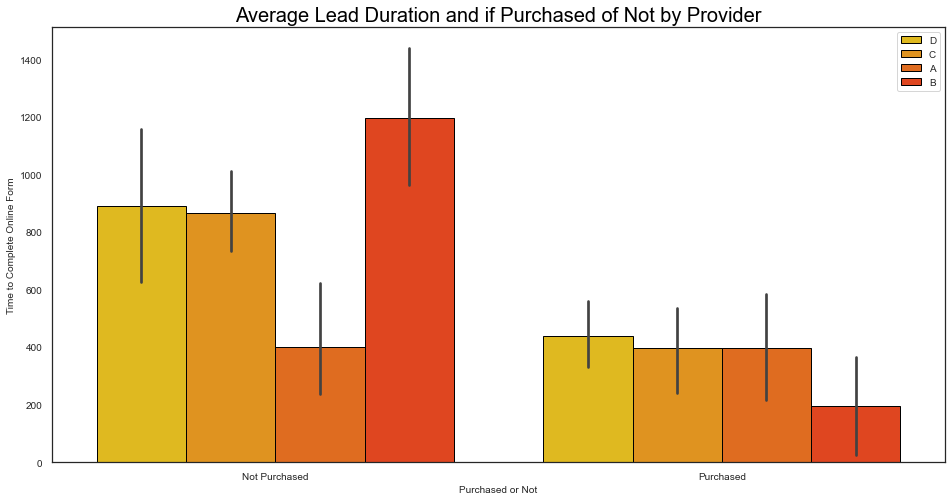

In [40]:
# set figure size
plt.figure(figsize=(16,8))
# make plot
sns.barplot(data=train, x='purchase', y='lead_duration', hue='provider', palette='autumn_r', edgecolor='black')
# set title
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
# set x label
plt.xlabel("Purchased or Not", size=10)
# set y label
plt.ylabel('Time to Complete Online Form', size=10)
# change x tick size
plt.xticks(fontsize=10) 
# change y tick size
plt.yticks(fontsize=10) 
# cplace legend
plt.legend(loc='upper right', prop={'size': 10})
# adjust x ticks
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


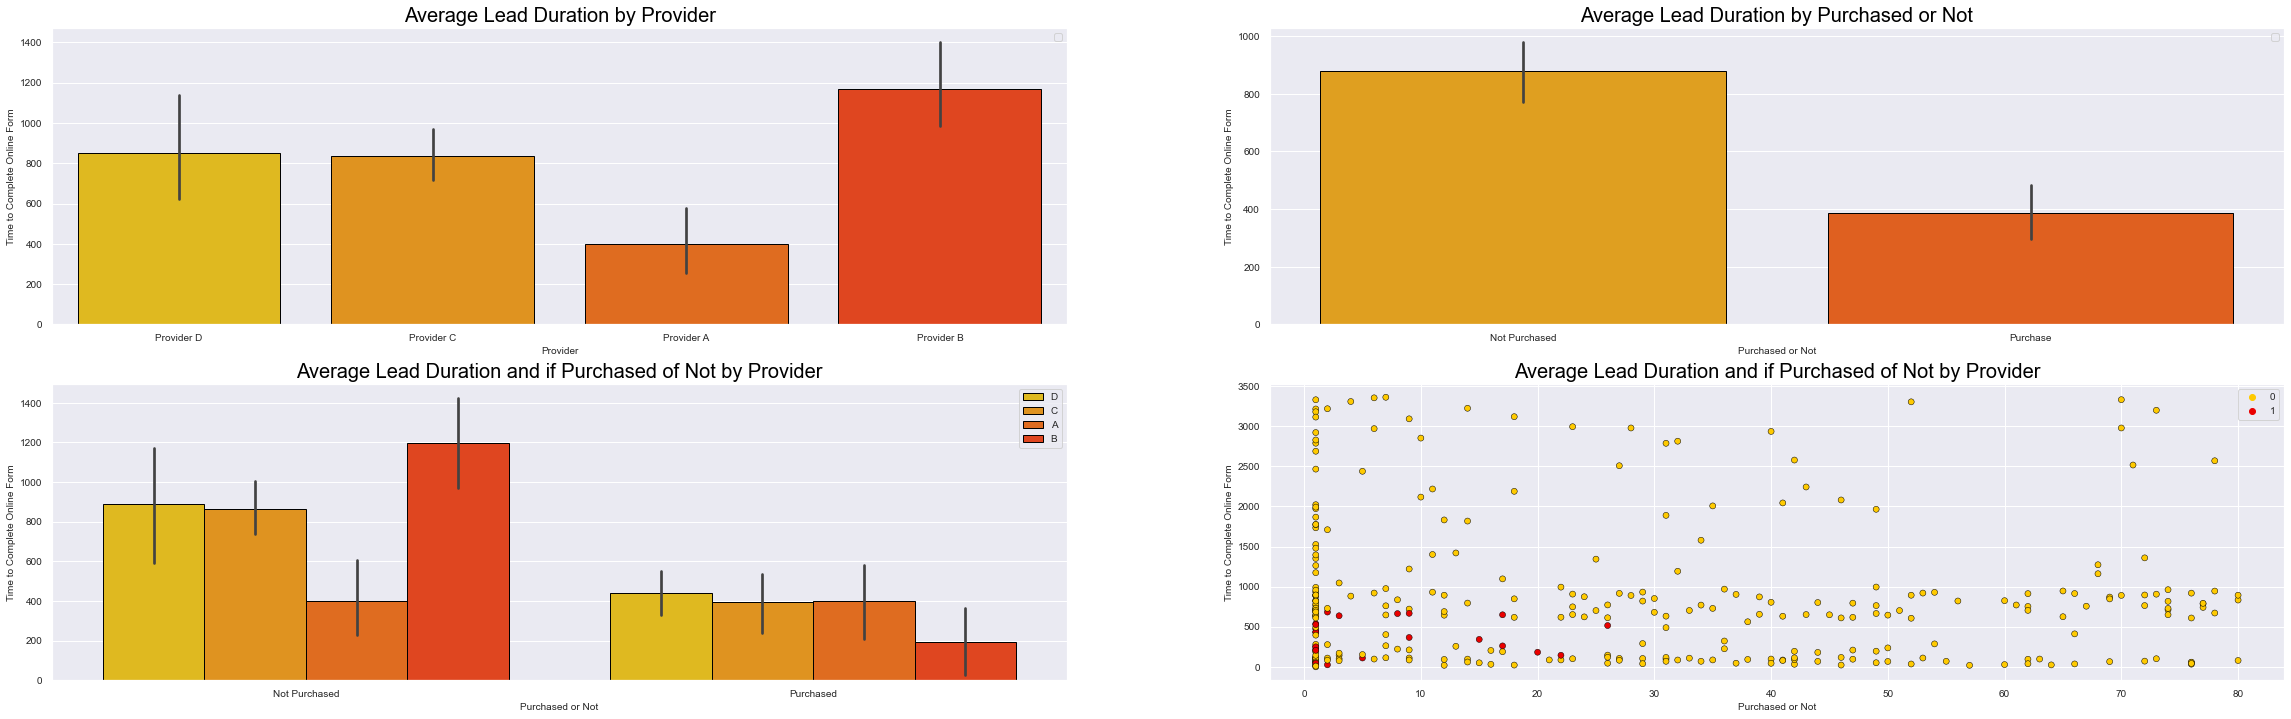

In [41]:
plt.subplots(2,2, figsize=(40,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.barplot(data=train, x='provider', y='lead_duration', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration by Provider", size=20, color='black')
plt.xlabel("Provider", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1, 2, 3], ['Provider D', 'Provider C', 'Provider A', 'Provider B'])

plt.subplot(2,2,2)
sns.barplot(data=train, x='purchase', y='lead_duration', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration by Purchased or Not", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchase'])

plt.subplot(2,2,3)
sns.barplot(data=train, x='purchase', y='lead_duration', hue='provider', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

plt.subplot(2,2,4)
sns.scatterplot(data=train, x='lead_age', y='lead_duration', hue='purchase', palette='hot_r', edgecolor='black')
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

plt.show()

### Takeaways:
- Provider B send leads that take the longest average time to complete the online form
- Provider A sends leads with the shortest average time 
- Leads purchased tend to have a shorter average duration than those leads not sold.
- Provider A's lead duration does not differ much between purchased and not purchased.
- Provider B's leads tht dont sell take about 12 hundred seconds to be completed but the ones that do sell tend to only take 200 seconds on average to be completed.
- Purchases tend to have much lower age and duration.

___

5. Is there a correlation between lead_age and provider?
    - seconds, between when a consumer submitted an online form to when CIC received the lead

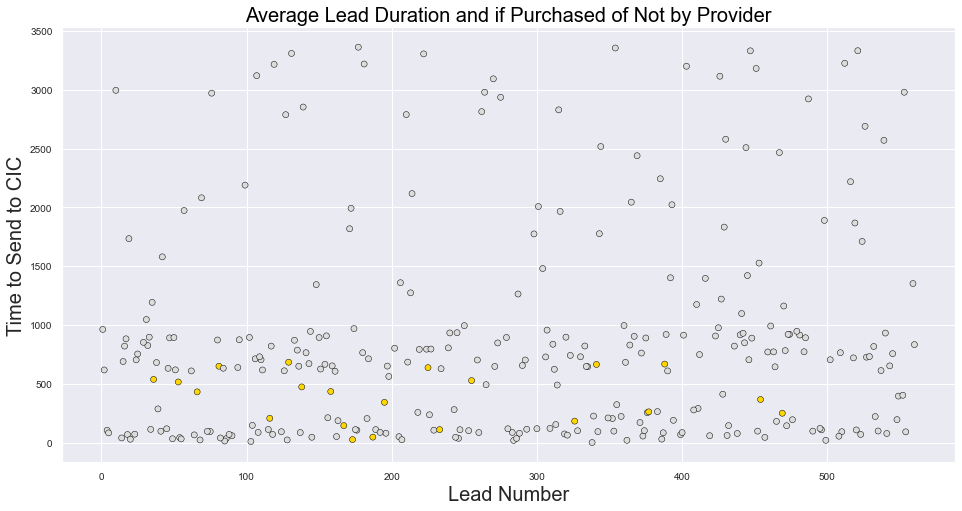

In [42]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
clrs = ['gainsboro', 'gold']
sns.scatterplot(data=train, x=train.index, y='lead_duration', hue='purchase', palette=clrs, 
                edgecolor='black', legend=None)
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Lead Number", size=20)
plt.ylabel('Time to Send to CIC', size=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.savefig("duration_scatter", transparent=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


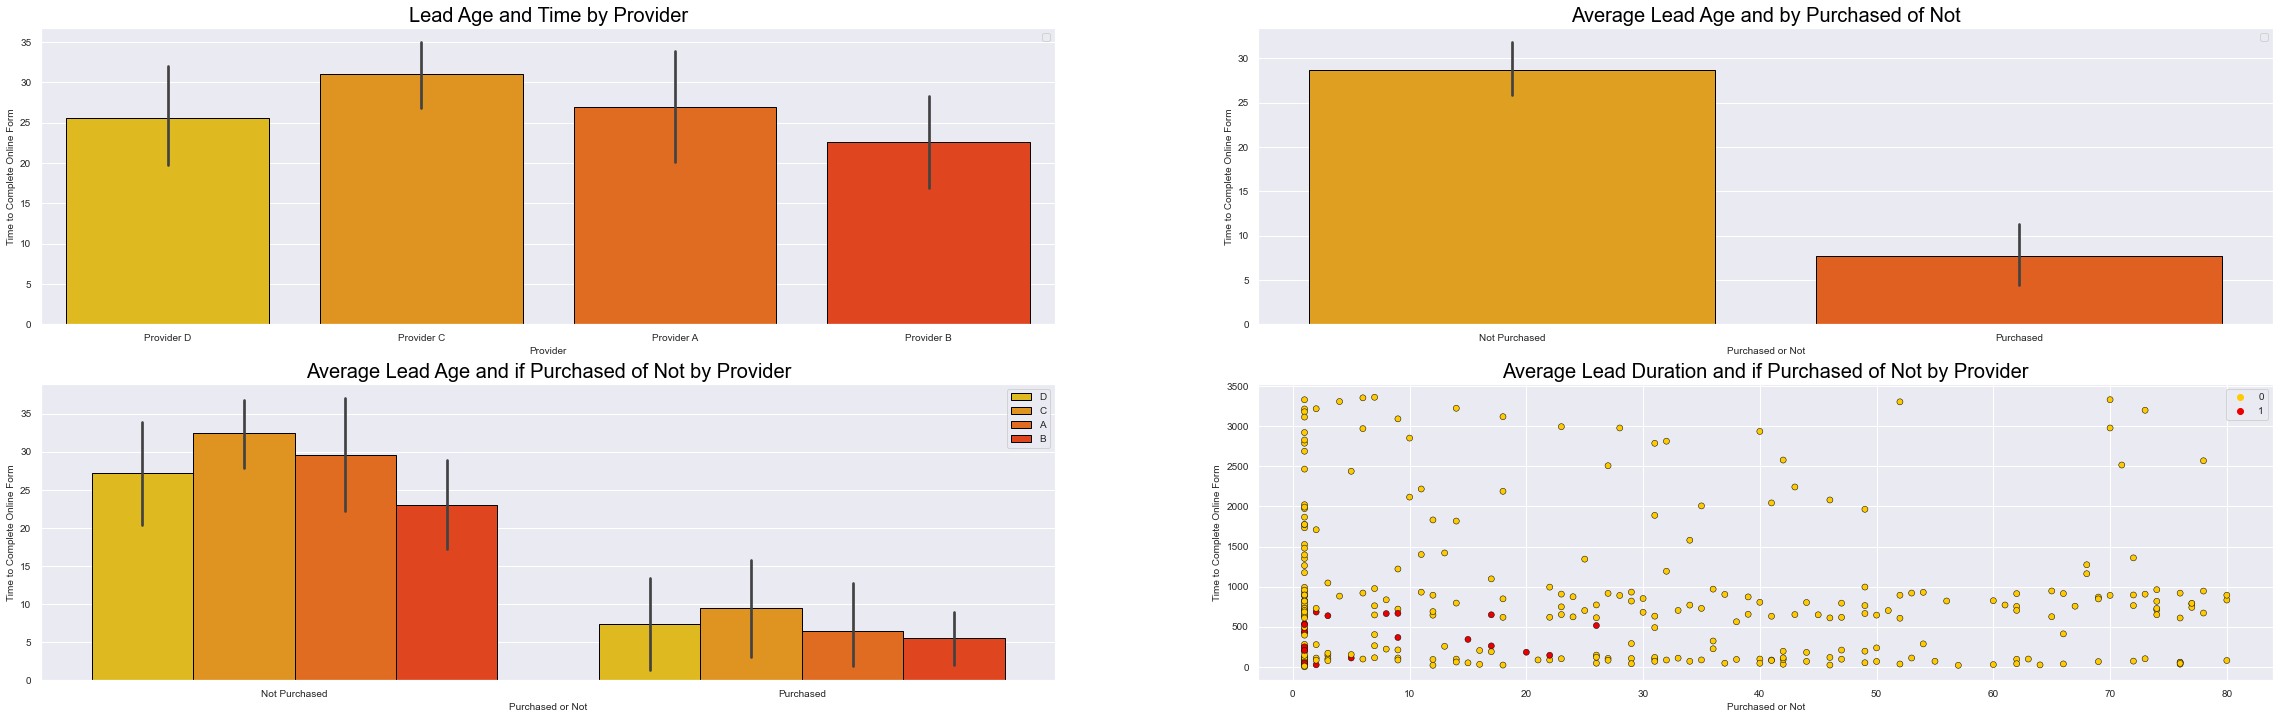

In [43]:
plt.subplots(2,2, figsize=(40,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.barplot(data=train, x='provider', y='lead_age', palette='autumn_r', edgecolor='black')
plt.title("Lead Age and Time by Provider", size=20, color='black')
plt.xlabel("Provider", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1, 2, 3], ['Provider D', 'Provider C', 'Provider A', 'Provider B'])

plt.subplot(2,2,2)
sns.barplot(data=train, x='purchase', y='lead_age', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Age and by Purchased of Not", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

plt.subplot(2,2,3)
sns.barplot(data=train, x='purchase', y='lead_age', hue='provider', palette='autumn_r', edgecolor='black')
plt.title("Average Lead Age and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

plt.subplot(2,2,4)
sns.scatterplot(data=train, x='lead_age', y='lead_duration', hue='purchase', palette='hot_r', edgecolor='black')
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Time to Complete Online Form', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

plt.show()

In [44]:
df[(df['purchase'] == 1)]

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
token,,,,,,,,,,,,,,,,,,,,
36,A,100,1,1,1,537,22,0,1,0,0,0,0,0,0,1,1,0,0,0
53,C,100,1,1,26,515,13,0,0,0,1,0,0,0,0,1,1,0,0,0
66,C,75,1,1,1,431,22,1,0,0,1,0,0,0,1,0,0,1,0,0
81,C,25,1,1,17,649,10,0,0,0,1,0,1,0,0,0,1,0,0,0
116,C,100,1,1,1,206,8,0,0,0,1,0,0,0,0,1,1,0,0,0
129,A,75,1,1,2,683,20,0,1,0,0,0,0,0,1,0,1,0,0,0
138,C,100,1,1,1,473,3,0,0,0,1,0,0,0,0,1,1,0,0,0
158,D,75,1,1,1,434,4,0,0,0,0,1,0,0,1,0,1,0,0,0
167,A,100,1,1,22,144,11,0,1,0,0,0,0,0,0,1,1,0,0,0


### Takeaways:
- Provider C take the longest to send leads to CIC on average
- Leads that are purchased have a much lower average age than those not purchased.

___

6. How much money are we loosing in this 92.23% of leads?

In [45]:
not_bought = df[df['purchase'] != 1]
money_lost = not_bought.groupby('lead_cost').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

money_lost.count().head(1)

provider    4
dtype: int64

### Takeaways:
- Money Lost:
    - 158 * 25 = 3,950
    - 208 * 50 = 10,400
    - 100 * 75 = 7,500
    - 61 * 100 = 6,100
- Total money lost = $27,950

___

7. How do providers pay off statistics match up?

In [46]:
pa_not_bought = df[(df['purchase'] != 1) & (df['provider'] == 'A')]
pb_not_bought = df[(df['purchase'] != 1) & (df['provider'] == 'B')]
pc_not_bought = df[(df['purchase'] != 1) & (df['provider'] == 'C')]
pd_not_bought = df[(df['purchase'] != 1) & (df['provider'] == 'D')]

pa_bought = df[(df['purchase'] == 1) & (df['provider'] == 'A')]
pb_bought = df[(df['purchase'] == 1) & (df['provider'] == 'B')]
pc_bought = df[(df['purchase'] == 1) & (df['provider'] == 'C')]
pd_bought = df[(df['purchase'] == 1) & (df['provider'] == 'D')]
#code_reasons.sort_values(by = 'open_date', ascending = False)
pa_money_lost = pa_not_bought.groupby('lead_cost').count()
pb_money_lost = pb_not_bought.groupby('lead_cost').count()
pc_money_lost = pc_not_bought.groupby('lead_cost').count()
pd_money_lost = pd_not_bought.groupby('lead_cost').count()

pa_well_spent = pa_bought.groupby('lead_cost').count()
pb_well_spent = pb_bought.groupby('lead_cost').count()
pc_well_spent = pc_bought.groupby('lead_cost').count()
pd_well_spent = pd_bought.groupby('lead_cost').count()

In [47]:
pd_well_spent

,provider,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
lead_cost,,,,,,,,,,,,,,,,,,,
25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
75,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


| Provider | # of leads priced 25 lost | # of leads priced 50 lost | # of leads priced 75 lost | # of leads priced 100 lost | Total Money Lost |
| ----- | ----- | ----- | ----- | ----- | ----- |
| A | 13 | 16 | 21 | 33 | 6,000 |
| B | 73 | 34 | 11 | 3 | 4,650 |
| C | 57 | 116 | 36 | 12 | 11,125 |
| D | 15 | 42 | 32 | 13 | 6,175 |

- total amount lost 27,953


| Provider | # of leads priced 25 purchased | # of leads priced 50 purchased | # of leads priced 75 purchased | # of leads priced 100 purchased | Total Money Well Spent |
| ----- | ----- | ----- | ----- | ----- | ----- |
| A | 1 | 1 | 2 | 4 | 625 |
| B | 2 | 0 | 0 | 0 | 50 |
| C | 3 | 0 | 4 | 3 | 675 |
| D | 1 | 1 | 4 | 1 | 475 |

- total amount well spent 1,825

| Provider | % of priced 25 bought | % of priced 50 bought | % of priced 75 bought | % of priced 100 bought |
| ----- | ----- | ----- | ----- | ----- | 
| A | 7.6% | 6.25% | 9.5% | 12.1% | 
| B | 2.7% | 0% | 0% | 0% | 
| C | 5.3% | 0% | 11.1% | 25% | 
| D | 6.6% | 2.4% | 12.5% | 7.7% | 

### Takeaways:
- Provider A:
    - Has lost CIC 6,000 dollars from leads that dont purchase
    - Spent 625 for leads that ended up purchasing with CIC.
    - Only 8.8% of all leads from provider a result in profit for CIC
- Provider B:
    - Has lost CIC 4,650 dollars from leads who did not purchase with CIC.
    - CIC has spent 50 dollars on leads that worked out from provider B
    - Only 1.6% of all leads from this provider result in profit
- Provider C:
    - Has resulted in a loss of 11,125 dollars
    - CIC has spent 675 dollars that resulted in a CIC purchase
    - Only 4.3% of leads from provider c result in a sale.
- Provider D
    - Has cause CIC to loos 6,175 without a profit.
    - CIC has spen 475 dollar on leads that have resulted in purchases.
    - Only 6.4% of leads from provider d have resulted with a sale.
- **Overall key findings**
    - Provider A tends to give us a higher probability of a sale.
    - Provider B is the least likely to result in a profit
    - Provider C tends to mostly sell leads priced at 50 dollars but out of 116 leads at this price point, none of them have resulted in a sale
        - We should probably not purchase leads at 50 dollars from provider C.
    - Provider C has the highest success through the 100 dollar price points!
        - With their leads priced at 100 succesfully resulting in purchases 25% of the time
    - Provider B has a 0% sales rate in 3 of the 4 price points
        - the only price point with any success was those set at 25, but even this only successfully turned nto a sale 2.7$ of the time.

___

In [48]:
df[(df['provider'] == 'D') & (df['contact'] == 0)].count()

provider          86
lead_cost         86
contact           86
purchase          86
lead_age          86
lead_duration     86
field_count       86
competitors       86
provider_a        86
provider_b        86
provider_c        86
provider_d        86
lead_costs_25     86
lead_costs_50     86
lead_costs_75     86
lead_costs_100    86
competitors_0     86
competitors_1     86
competitors_2     86
competitors_3     86
dtype: int64

___

8. How many of the people that were contacted signed on?
9. How many that were not contacted signed on?

In [49]:
contacted_bought = df[(df['purchase'] == 1) & (df['contact'] == 1)]
cb_number = contacted_bought.groupby('purchase').count()
cb_number

,provider,lead_cost,contact,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
purchase,,,,,,,,,,,,,,,,,,,
1,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27


In [50]:
contacted_not_bought = df[(df['purchase'] != 1) & (df['contact'] == 1)]
cnb_number = contacted_not_bought.groupby('purchase').count()
cnb_number

,provider,lead_cost,contact,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
purchase,,,,,,,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59


### Takeaways:
- 100% of people not able to be contacted resulted in no sale
- 31.4% of leads contacted resulted in a purchase.

___

# Statistical tests

___

### Purchase & provider(s)
Using a chi square test.
- I am doing this because we are drawing a comparison between 2 categorical varaibles.
Using Anova test
- I am doing this because one of the categorical variables has more than 2 categories

### Look at Contigency Table

In [53]:
contigency= pd.crosstab(train['purchase'], train['provider']) 
contigency

provider,A,B,C,D
purchase,,,,
0,45,71,120,53
1,6,2,8,5


In [54]:
contigency_pct = pd.crosstab(df['purchase'], df['provider'], normalize='index')
contigency_pct

provider,A,B,C,D
purchase,,,,
0,0.157495,0.229602,0.419355,0.193548
1,0.296296,0.074074,0.370370,0.259259


### First test against provider as a whole

In [55]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.provider, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the provider of a lead are independent from each other"
alt_hypothesis = "The purchase and the lead provider dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.8328
 
The alpha value is: 
 0.05


### Now test against each provider individually

In [56]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.provider_a, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and provider A are independent from each other"
alt_hypothesis = "The purchase and the lead provider A are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.6613
 
The alpha value is: 
 0.05


In [57]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.provider_b, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and provider B are independent from each other"
alt_hypothesis = "The purchase and the lead provider B are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.6516
 
The alpha value is: 
 0.05


In [58]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.provider_c, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and provider C are independent from each other"
alt_hypothesis = "The purchase and the lead provider C are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.9989
 
The alpha value is: 
 0.05


In [59]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.provider_d, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and provider D are independent from each other"
alt_hypothesis = "The purchase and the lead provider D are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.9837
 
The alpha value is: 
 0.05


### Try an Anova Test

In [60]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
alpha = 0.05
null_hypothesis = 'There is no difference in purchase between the providers.'
F, p = stats.f_oneway( 
    train.purchase[train.provider=='A'],
    train.purchase[train.provider=='B'],
    train.purchase[train.provider=='C'],
    train.purchase[train.provider=='D'])
if p > alpha:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We fail to reject the null hypothesis. The null hypothesis is that There is no difference in purchase between the providers.


___

### Purchase & lead_cost
Using a chi square test.
- I am doing this because we are drawing a comparison between 2 categorical varaibles.

Using Anova test
- I am doing this because one of the categorical variables has more than 2 categories

### Look at contingency table

In [61]:
contigency = pd.crosstab(df['purchase'], df['lead_cost'])
contigency

lead_cost,25,50,75,100
purchase,,,,
0,158,208,100,61
1,7,2,10,8


In [62]:
contigency_pct = pd.crosstab(df['purchase'], df['lead_cost'], normalize='index')
contigency_pct

lead_cost,25,50,75,100
purchase,,,,
0,0.299810,0.394687,0.189753,0.115750
1,0.259259,0.074074,0.370370,0.296296


### First test it on lead cost as a whole then do it for each individual

In [63]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.lead_cost, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the cost of a lead are independent from each other"
alt_hypothesis = "The purchase and the lead cost are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.0599
 
The alpha value is: 
 0.05


In [64]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.lead_costs_25, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the cost of a lead being 25 are independent from each other"
alt_hypothesis = "The purchase and the lead cost of 25 are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.9533
 
The alpha value is: 
 0.05


In [65]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.lead_costs_50, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the cost of a lead being 50 are independent from each other"
alt_hypothesis = "The purchase and the lead cost of 50 are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.1651
 
The alpha value is: 
 0.05


In [66]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.lead_costs_75, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the cost of a lead being 75 are independent from each other"
alt_hypothesis = "The purchase and the lead cost of 75 are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.7213
 
The alpha value is: 
 0.05


In [67]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.lead_costs_100, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the cost of a lead being 100 are independent from each other"
alt_hypothesis = "The purchase and the lead cost of 100 are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I reject the hypothesis that: 
 The purchase with CIC and the cost of a lead being 100 are independent from each other
 
I move forward with my alternative hypothesis that 
 The purchase and the lead cost of 100 are dependent from one another.
 
The alpha is: 
 0.05
 
P value is: 
 0.0437


### Now anova

In [68]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
alpha = 0.05
null_hypothesis = 'there is no difference in purchase between the cost of a lead.'
F, p = stats.f_oneway( 
    train.purchase[train.lead_cost==25],
    train.purchase[train.lead_cost==50],
    train.purchase[train.lead_cost==75],
    train.purchase[train.lead_cost==100])
if p > alpha:
    print("I fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("I reject the null hypothesis that", null_hypothesis)

I reject the null hypothesis that there is no difference in purchase between the cost of a lead.


### Purchase & contact

Using a chi square test.
- I am doing this because we are drawing a comparison between 2 categorical varaibles.

### Look at contingency table

In [69]:
contigency = pd.crosstab(df['purchase'], df['contact'])
contigency

contact,0,1
purchase,,
0,468,59
1,0,27


In [70]:
contigency_pct = pd.crosstab(df['purchase'], df['contact'], normalize='index')
contigency_pct

contact,0,1
purchase,,
0,0.888046,0.111954
1,0.000000,1.000000


In [71]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.contact, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the cost of a lead being 50 are independent from each other"
alt_hypothesis = "The purchase and the lead cost of 50 are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I reject the hypothesis that: 
 The purchase with CIC and the cost of a lead being 50 are independent from each other
 
I move forward with my alternative hypothesis that 
 The purchase and the lead cost of 50 are dependent from one another.
 
The alpha is: 
 0.05
 
P value is: 
 0.0


### Purchase & lead age
Using pearsonr
- doing this to see if there is a correlatation between purchand and lead age
- doing this because there is one categorical and one continuous variable

In [72]:
null_hypothesis = "There is no correlation between number of purchases and lead age."
alt_hypothesis = "There is a correlation between number of purchases and lead age."
confidence_level = .95
a = 1 - confidence_level
x = train.purchase
y= train.lead_age

corr, p = stats.pearsonr(x, y)
print(f' The correlation between purchase and the lead age is: \n', corr)
print(f' The P value between purchase and lead age is: \n', p)

 The correlation between purchase and the lead age is: 
 -0.20753570203656613
 The P value between purchase and lead age is: 
 0.00023376393530933126


In [73]:
if p < a:
    print(f"Reject null hypothesis: \n'{null_hypothesis}'")
    print(' ')
    print(f"We now move forward with our alternative hypothesis: \n'{alt_hypothesis}'")
    print(' ')
    if 0 < corr < .6:
        print("This is a weak positive correlation.")
    elif .6 < corr < 1:
        print("That is a strong positive correlation.")
    elif -.6 < corr < 0:
        print("This is a weak negative correlation.")
    elif -1 < corr < -.6:
        print("That is a strong negative correlation.")
    
else : 
    print("Fail to reject the null hypothesis.")

Reject null hypothesis: 
'There is no correlation between number of purchases and lead age.'
 
We now move forward with our alternative hypothesis: 
'There is a correlation between number of purchases and lead age.'
 
This is a weak negative correlation.


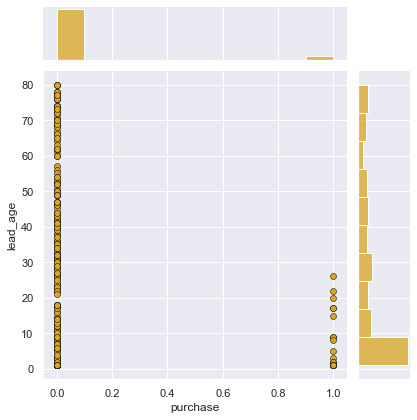

In [74]:
sns.jointplot(data=train, x='purchase', y='lead_age', color='goldenrod', edgecolor='black')

### Purchase & lead duration
Using pearsonr
- doing this to see if there is a correlatation between purchand and lead duration
- doing this because there is one categorical and one continuous variable

In [75]:
null_hypothesis = "There is no correlation between number of purchases and lead duration."
alt_hypothesis = "There is a correlation between number of purchases and lead duration."
confidence_level = .95
a = 1 - confidence_level
x = train.purchase
y= train.lead_duration

corr, p = stats.pearsonr(x, y)
print(f' The correlation between purchase and the lead duration is: \n', corr)
print(f' The P value between purchase and lead duration is: \n', p)

 The correlation between purchase and the lead duration is: 
 -0.14007162265185477
 The P value between purchase and lead duration is: 
 0.01357058611706759


In [76]:
if p < a:
    print(f"Reject null hypothesis: \n'{null_hypothesis}'")
    print(' ')
    print(f"We now move forward with our alternative hypothesis: \n'{alt_hypothesis}'")
    print(' ')
    if 0 < corr < .6:
        print("This is a weak positive correlation.")
    elif .6 < corr < 1:
        print("That is a strong positive correlation.")
    elif -.6 < corr < 0:
        print("This is a weak negative correlation.")
    elif -1 < corr < -.6:
        print("That is a strong negative correlation.")
    
else : 
    print("Fail to reject the null hypothesis.")

Reject null hypothesis: 
'There is no correlation between number of purchases and lead duration.'
 
We now move forward with our alternative hypothesis: 
'There is a correlation between number of purchases and lead duration.'
 
This is a weak negative correlation.


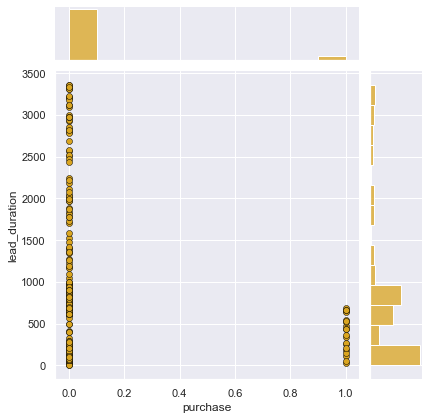

In [77]:
sns.jointplot(data=train, x='purchase', y='lead_duration', color='goldenrod', edgecolor='black')

### Purchase & field count
Using pearsonr
- doing this to see if there is a correltation becterrn purchand and field count

Using Anova test
- I am doing this because one of the the 2 'categorical' variables has more than 2 categories

### First Pearson R

In [78]:
null_hypothesis = "There is no correlation between number of purchases and number of fields on a submission form."
alt_hypothesis = "There is a correlation between number of purchases and number of fields on a submission form."
confidence_level = .95
a = 1 - confidence_level
x = train.purchase
y= train.field_count

corr, p = stats.pearsonr(x, y)
print(f' The correlation between purchase and the field count is: \n', corr)
print(f' The P value between purchase and pield count is: \n', p)

 The correlation between purchase and the field count is: 
 -0.07489431645346789
 The P value between purchase and pield count is: 
 0.18845235275962346


In [79]:
if p < a:
    print(f"Reject null hypothesis: \n'{null_hypothesis}'")
    print(' ')
    print(f"We now move forward with our alternative hypothesis: \n'{alt_hypothesis}'")
    print(' ')
    if 0 < corr < .6:
        print("This is a weak positive correlation.")
    elif .6 < corr < 1:
        print("That is a strong positive correlation.")
    elif -.6 < corr < 0:
        print("This is a weak negative correlation.")
    elif -1 < corr < -.6:
        print("That is a strong negative correlation.")
    
else : 
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


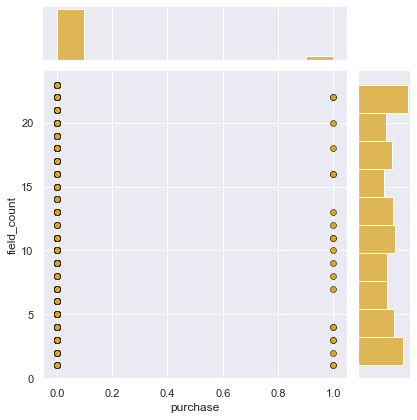

In [80]:
sns.jointplot(data=train, x='purchase', y='field_count', color='goldenrod', edgecolor='black')

### Now Anova

In [81]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
alpha = 0.05
null_hypothesis = 'there is no difference in purchase between the number of fields in a form.'
F, p = stats.f_oneway( 
    train.purchase[train.field_count==1],
    train.purchase[train.field_count==2],
    train.purchase[train.field_count==3],
    train.purchase[train.field_count==4],
    train.purchase[train.field_count==5],
    train.purchase[train.field_count==6],
    train.purchase[train.field_count==7],
    train.purchase[train.field_count==8],
    train.purchase[train.field_count==9],
    train.purchase[train.field_count==10],
    train.purchase[train.field_count==11],
    train.purchase[train.field_count==12],
    train.purchase[train.field_count==13],
    train.purchase[train.field_count==14],
    train.purchase[train.field_count==15],
    train.purchase[train.field_count==16],
    train.purchase[train.field_count==17],
    train.purchase[train.field_count==18],
    train.purchase[train.field_count==19],
    train.purchase[train.field_count==20],
    train.purchase[train.field_count==21],
    train.purchase[train.field_count==22],
    train.purchase[train.field_count==23])
if p > alpha:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We fail to reject the null hypothesis. The null hypothesis is that there is no difference in purchase between the number of fields in a form.


### Purchase & competitors

Using a chi square test.
- I am doing this because we are drawing a comparison between 2 categorical varaibles.

Using Anova test
- I am doing this because one of the categorical variables has more than 2 categories

### Start with chi squared for competitors as a whole
#### Look at contigency tables

In [82]:
contigency = pd.crosstab(df['purchase'], df['competitors'])
contigency

competitors,0,1,2,3
purchase,,,,
0,339,88,83,17
1,23,3,1,0


In [83]:
contigency_pct = pd.crosstab(df['purchase'], df['competitors'], normalize='index')
contigency_pct

competitors,0,1,2,3
purchase,,,,
0,0.643264,0.166983,0.157495,0.032258
1,0.851852,0.111111,0.037037,0.000000


In [84]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.5167
 
The alpha value is: 
 0.05


### Chi square for each individual competitor

In [85]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors_0, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.1567
 
The alpha value is: 
 0.05


In [86]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors_1, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.8927
 
The alpha value is: 
 0.05


In [87]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors_2, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.4443
 
The alpha value is: 
 0.05


In [88]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors_3, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.9449
 
The alpha value is: 
 0.05


### Now for Anova test

In [89]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
alpha = 0.05
null_hypothesis = 'there is no difference in purchase between the number of competitors for a lead.'
F, p = stats.f_oneway( 
    train.purchase[train.competitors==0],
    train.purchase[train.competitors==1],
    train.purchase[train.competitors==2],
    train.purchase[train.competitors==3])
if p > alpha:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We fail to reject the null hypothesis. The null hypothesis is that there is no difference in purchase between the number of competitors for a lead.


### Check correlation

In [90]:
null_hypothesis = "There is no correlation between number of purchases and amount of competitors."
alt_hypothesis = "There is a correlation between number of purchases and amount of competitors."
confidence_level = .95
a = 1 - confidence_level
x = train.purchase
y= train.competitors

corr, p = stats.pearsonr(x, y)
print(f' The correlation between purchase and the lead duration is: \n', corr)
print(f' The P value between purchase and lead duration is: \n', p)

 The correlation between purchase and the lead duration is: 
 -0.14768186710622083
 The P value between purchase and lead duration is: 
 0.009214359686999843


In [91]:
if p < a:
    print(f"Reject null hypothesis: \n'{null_hypothesis}'")
    print(' ')
    print(f"We now move forward with our alternative hypothesis: \n'{alt_hypothesis}'")
    print(' ')
    if 0 < corr < .6:
        print("This is a weak positive correlation.")
    elif .6 < corr < 1:
        print("That is a strong positive correlation.")
    elif -.6 < corr < 0:
        print("This is a weak negative correlation.")
    elif -1 < corr < -.6:
        print("That is a strong negative correlation.")
    
else : 
    print("Fail to reject the null hypothesis.")

Reject null hypothesis: 
'There is no correlation between number of purchases and amount of competitors.'
 
We now move forward with our alternative hypothesis: 
'There is a correlation between number of purchases and amount of competitors.'
 
This is a weak negative correlation.


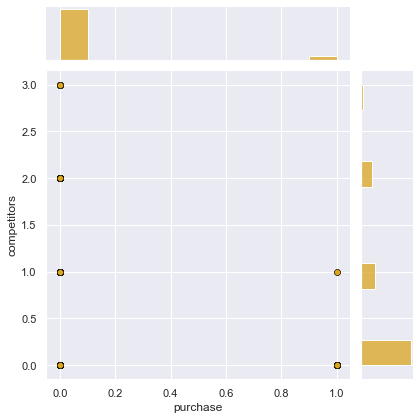

In [92]:
sns.jointplot(data=train, x='purchase', y='competitors', color='goldenrod', edgecolor='black')

___

# What to do with modeling

#### When moving forward with modeling I will be creating 2 different models:
1. Using just CIC's original data
    - provider
    - lead_cost
    - contact
    - purchase
** the reason for this is to show how a model would perform using just their data

2. A model incorperating the Jornaya data
    - lead_age
    - lead_duration
    - field_count
    - competitors
** the reason for this is to show the difference that the Jornaya data would make the CIC's hypothetical model

## What features to model with

### CIC Model:
- `provider`
    - did not pass the statistical test
    - but the explore tells me there is a drive on purchases between providers
    - I will  be moving forward with this in the model
- `lead_cost`
    - Anova rejected the null and the chi square for pricing of 100 sollars rejected the null
    - chi square for 25-75 did not reject the null
    - will be using in the model
        - testing mulitple models 1 model has all lead costs and the other with just 100
            - which performs better?
- `contact`
    - chi square rejected the null
    - there is evidence from explore to say it does affect the purchase
    - will be using in model
- `purchase`
    - the target variable and will not be used in the model itself
        - this would be cheating and cause an overfit model

### Jornaya Model
- `lead_age`
    - according to statistical testing (pearsonr) this is directly correlated to purchases
    - will be using this in the model
- `lead_duration`
    - according to statistical testing (pearsonr) this is directly correlated to purchases
    - will be using this in the model
- `field_count`
    - according to pearsonr there is no direct correlation between field count and purchase
    - according to anova test there is no difference in purchase between the number of fields in a form.
    - will not be moving forward with this in the model
- `competitors`
    - according to both chi and anova this has no play into purchase
    - pearson r found a correltation between this and purchase
    - Will test 2 different models on train
        - which ever one runs best will determine which  will move forward
            - 1 using this feature
            - another not usign the feature